# The solution of nonlinear equations


In [12]:
%matplotlib inline
import math
import numpy as np
import pylab as pl

## Nonlinear equations

-   general form of equation, $x$ real $$ f(x) = 0 $$
-   exact solution $x=x^*$

**examples:**

1.  geometric: compute length requires square root: $f(x) = x^2 -d$
2.  decision problems: when cost $g(x)$ hits $g_0$: $f(x) = g(x) - g_0$
3.  stationary states of dynamical systems
    -   discrete time $x(t+1) = g(x(t))$: $f(x) = x - g(x)$
    -   continuous time $x^\prime(t) = g(x(t))$: $f(x) = g(x)$

4.  optimisation of $g(x)$: maximum: $f(x) = g^\prime(x)$

------------------------------------------------------------

**Question:** What is your favorite nonlinear equation? Can you recall an application?


## simple examples, explicit solutions

-   solution of linear equation $f(x) = ax + b$, $a\neq 0$: $$ x^* = -b/a $$

-   quadratic equation $x^2 - d$ (square root of $d$)
    -   has two solutions $x^*_{1,2}= \pm \sqrt{d}$ if $d>0$
    -   has one solution $x^*=0$ if $d=0$
    -   has no (real) solutions if $d<0$
-   the determination of the square root requires a numerical algorithm which is typically part of the system library (math in Python)

-   for most equations it is not possible to find a formula for the solution

-   range reduction: one only needs algorithm for $1< d< 4$ as $$\sqrt{4^k d} = 2^k \sqrt{d}$$


## continuous functions $f$ -- getting help from calculus

**Bolzano's theorem**
  *If $f(x)$ is a continuous real valued function on the interval $[a, b]$ and $f(a)\cdot f(b) \leq 0$ then there exists a solution $x=x^*\in[a,b]$ of the equation $f(x)=0$.*

-   consequence of intermediate value theorem for continuous functions

-   existence of solution: If we know real numbers $a$ and $b$ such that $f(a)$ and $f(b)$ have different signs then we know that there is a solution of $f(x)=0$ between $a$ and $b$

--------------------------------------------------------------------------------

**iterations -- our class of solution methods**

-   determine a sequence $x_0, x_1, \ldots$ by $$ x_{n+1} = F_n(x_0,x_1,\ldots,x_n) $$ such that $$ x_n \rightarrow x^*, \quad \text{for $n\rightarrow \infty$} $$

-   we will study some very successful choices of $F$

-   $F$ has to depend on $f(x)$

# The Bisection Method


## Bisection 

* construction of intervals $I_k$ such that $I_{k+1} \subset I_k$ contain the solution $x^*$ of
  $$f(x) = 0$$
* solution is unique if $f(x)$ (strictly) increasing or decreasing
* size of the intervals $$|I_{k+1}| = 0.5 |I_k|$$
* as size of intervals goes to zero there is exactly one real number contained in
  $$\bigcap_{k=1}^\infty I_k$$
  
* intervals chosen to maintain different signs of $f(x)$ on the two endpoints of $I_k$

--------------------------------------------------------------------------------------

In [13]:
# First version of code

def bisect(f,a,b,n):
    # first simple bisection code
    fa, fb = f(a), f(b)
    for i in range(n):
        m = (a+b)/2.0
        fm = f(m)
        if fa*fm <= 0:
            b, fb = m, fm
        else:
            a, fa = m, fm        
    return (a+b)/2.0, (b-a)/2.0, f((a+b)/2)  # output

* try this out and challenge the code with difficult examples, then fix the probems and retry

----------------------------------------------------------------------------------

## Example $f(x) = x^2 - 3$

* verify that $I_0 = [1,2]$ contains the zero
* after first subdivision one gets $I_1 = [1.5,2]$

--------------------------------------------------------------

In [16]:
f = lambda x : x*x - 3; xex=math.sqrt(3)
a = 1.0; b = 2.0; fa, fb = f(a), f(b)
print("exact solution:  sqrt(3.0)= %g"%(xex))
print("interval [%g,%g] contains the zero? %s"%(a,b,fa*fb <= 0)) 
xex = math.sqrt(3.0)
for k in range(10):    
    m, e, fm = bisect(f,a,b,1) # one step
    a = m-e
    b = m+e
    print("[a,b]=[%6.4g,%6.4g],  e/ebound=%8.1e, f(m)=%8.1e"%(a,b,(m-xex)/e,fm)) 

exact solution:  sqrt(3.0)= 1.73205
interval [1,2] contains the zero? True
[a,b]=[   1.5,     2],  e/ebound= 7.2e-02, f(m)= 6.2e-02
[a,b]=[   1.5,  1.75],  e/ebound=-8.6e-01, f(m)=-3.6e-01
[a,b]=[ 1.625,  1.75],  e/ebound=-7.1e-01, f(m)=-1.5e-01
[a,b]=[ 1.688,  1.75],  e/ebound=-4.3e-01, f(m)=-4.6e-02
[a,b]=[ 1.719,  1.75],  e/ebound= 1.5e-01, f(m)= 8.1e-03
[a,b]=[ 1.719, 1.734],  e/ebound=-7.0e-01, f(m)=-1.9e-02
[a,b]=[ 1.727, 1.734],  e/ebound=-4.1e-01, f(m)=-5.5e-03
[a,b]=[  1.73, 1.734],  e/ebound= 1.9e-01, f(m)= 1.3e-03
[a,b]=[  1.73, 1.732],  e/ebound=-6.2e-01, f(m)=-2.1e-03
[a,b]=[ 1.731, 1.732],  e/ebound=-2.4e-01, f(m)=-4.1e-04


-------------------------------------------------------------------------------

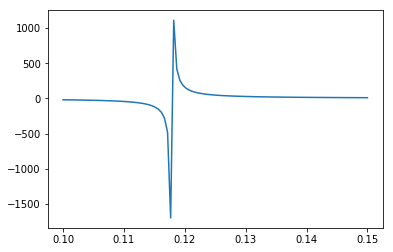

In [17]:
# challenging example for testing
f = lambda x : (x**3+4.0*x**2+3.0*x+5.0)/(2.0*x**3-9.0*x**2+18.0*x-2.0)
xg = np.linspace(0.1, 0.15, 100)
pl.plot(xg, f(xg));

--------------------------------------------------------------------------

In [18]:
a = 0.1; b = 0.15; fa, fb = f(a), f(b)
print("interval [%g,%g] contains the zero?"%(a,b),fa*fb<=0) 
for k in range(10):
    m, e, fm = bisect(f,a,b,1) # one step
    a = m-e
    b = m+e
    print("[a,b]=[%8.5g,%8.5g], f(m)=%8.1e, eb=%8.1e"%(a,b,fm,e)) 

interval [0.1,0.15] contains the zero? True
[a,b]=[     0.1,   0.125], f(m)=-6.3e+01, eb= 1.2e-02
[a,b]=[  0.1125,   0.125], f(m)= 3.9e+02, eb= 6.2e-03
[a,b]=[  0.1125, 0.11875], f(m)=-1.5e+02, eb= 3.1e-03
[a,b]=[ 0.11563, 0.11875], f(m)=-4.9e+02, eb= 1.6e-03
[a,b]=[ 0.11719, 0.11875], f(m)= 3.7e+03, eb= 7.8e-04
[a,b]=[ 0.11719, 0.11797], f(m)=-1.1e+03, eb= 3.9e-04
[a,b]=[ 0.11758, 0.11797], f(m)=-3.3e+03, eb= 2.0e-04
[a,b]=[ 0.11777, 0.11797], f(m)=-6.2e+04, eb= 9.8e-05
[a,b]=[ 0.11787, 0.11797], f(m)= 7.8e+03, eb= 4.9e-05
[a,b]=[ 0.11787, 0.11792], f(m)= 1.8e+04, eb= 2.4e-05



## Bisection Algorithm: First Version -- weaknesses


* no test for accuracy
   * examples: small interval, error bounds
* rounding errors can cause problems -- might even get sign wrong for small $f(x)$!

* infinite loops due to small intervals or negative $\delta$
* discontinuities may mask as zeros
* what if $a > b$?

The test for accuracy is not specified. The obvious thing is to require the interval to be small enough such that the root is known to within a certain maximum error $\delta$. 

## Bisection Algorithm: Second Version

    Initialisation
    Find a, b that surround a root [f(a),f(b)] of opposite signs, 
    rename them if necessary so that a< b, 
        and specify an iteration limit M, desired error bound delta 
        and a “zero threshold” \epsilon. 
    Evaluate u=f(a), v=f(b), e=b-a 
    stop [failure due to bad initial interval] 
    Initialise the count of steps done, n=0

    loop-start-2
        Set e=e/2, m=a+e, w=f(m), n=n+1 
        Stop: output m, e and w, and stop success 
        Stop: output m, e and w, and stop “probable success” 
        Stop: output m, e and w, and stop failure to converge 
        set a=m, u=w set b=m, v=w 
    Repeat from step 7

-------------------------------------------------

* sign only used in choosing subinterval
* but still problem with sign for small intervals and uncertainty of root

In [12]:
# TODO: code an improved version of bisection in python

## Convergence, Error Analysis and Convergence Rate

* automatic simple and reliable upper bound of error if $f(x)$ continous
* stops for good approximation
* error bound (by induction)

$$|x^*-m_n|< d_n/2=(b_0-a_0)/2^{n+1},\;\rightarrow 0\text{ as }n\rightarrow \infty$$

-----------------------------------------------------------------------

* ignoring rounding errors, one can make the error as small as desired by taking enough steps
* error tolerance achieved when $(b_0-a_0)/2^{n+1}\leq \delta$
* requires $\log_2 10 \approx 3.3$ steps to reduce error by factor 10
    * we can predict accuracy!
* but:
    * only computes one of all possible zeros
    * may be tricked by a singularity
<!-- end of NB2.7-->